# Problem Set 2

## Question 1

Consider the following Python module:

a = 0

def b():
global a
a = c(a)

def c(a):
return a + 2

After importing the module into the interpreter, you execute:

b()

b()

b()

a

?

What value is displayed when the last expression (a) is evaluated? Explain your answer by indicating what happens in every executed statement.

## Code Solution for Question 1

In [1]:
a=0

def b():
    global a
    a = c(a)
    return a

def c(a):
    return a + 2

print(b())
print(b())
print(b())
print(a)

2
4
6
6


## Explanation for solution of Ques 1

In the first call to b(), the global a is used i.e. 0. Which is then passed to c() from which the value of a becomes 2 and hence b() returns 2.
In the second b() call the same process is followed so value of a becomes 4.
The same thing is done in the 3rd b() call. The value of a becomes 6.
As the a used in b() was declared global so the value change of a is made to the global a. Hence the final value of a becomes 6.

## Question 2

Function fileLength(), given to you, takes the name of a file as input and returns the length of the file:
fileLength('midterm.py')

284

fileLength('idterm.py')

Traceback (most recent call last):

File "<pyshell#34>", line 1, in module

fileLength('idterm.py')

File "/Users/me/midterm.py", line 3, in fileLength

infile = open(filename)

FileNotFoundError: [Errno 2] No such file or directory:

'idterm.py'

As shown above, if the file cannot be found by the interpreter or if it cannot be read as a text file, an exception will be raised. Modify function fileLength() so that a friendly message is printed instead:

fileLength('midterm.py')

358

fileLength('idterm.py')

File idterm.py not found.

## Code Solution for Question 2

In [2]:
def fileLength(filename):
    try:
        open_file = open(filename, 'r')
        file_data = open_file.read()
        length_of_file = len(file_data)
        open_file.close()
        return length_of_file
    except:
        return "file "+ filename + " not found."

In [3]:
fileLength('w3c.html')

396

In [4]:
fileLength("idterm.py")

'file idterm.py not found.'

## Question 3

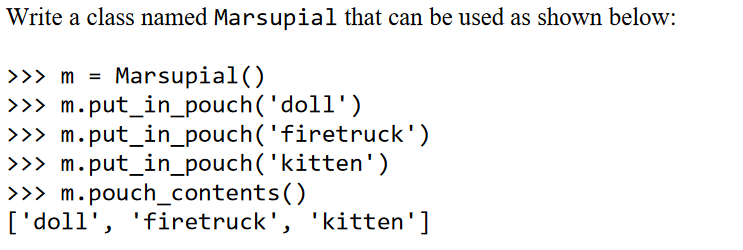

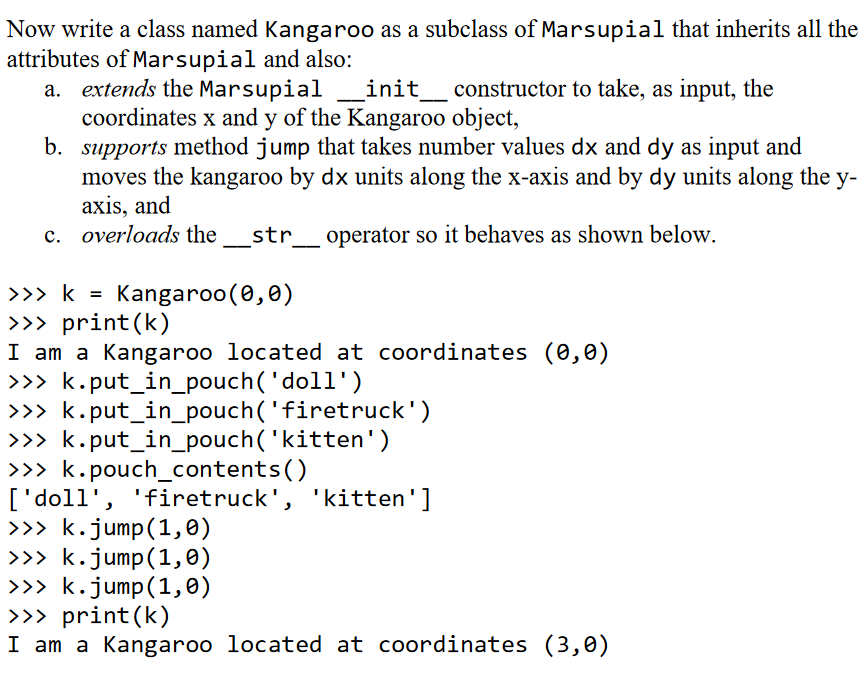

## Code Solution for Question 3 

In [9]:
#creating Marsupial class
class Marsupial:

    def __init__(self):
        self.new_list = []
        self.new_list.clear()

    def put_in_pouch(self, value):
        self.new_list.append(value)

    def pouch_contents(self):
        return self.new_list
    
m = Marsupial()
m.put_in_pouch('doll')
m.put_in_pouch('firetruck')
m.put_in_pouch('kitten')
print(m.pouch_contents())

['doll', 'firetruck', 'kitten']


In [11]:
#creating #Kangaroo" class that inherits from "Marsupial"
class Kangaroo(Marsupial):

    def __init__(self,x,y):
        self.new_list = []
        self.new_list.clear ()
        self.x = x
        self.y = y
        
    def  __str__(self):
         return ("I am a Kangaroo located at coordinates ("+str(self.x)+","+str(self.y)+")")

    def jump(self,dx,dy):
        self.x = self.x + dx
        self.y = self.y + dy
    
        
k = Kangaroo(0,0)
print(k)

I am a Kangaroo located at coordinates (0,0)


In [12]:
k.put_in_pouch('doll')
k.put_in_pouch('firetruck')
k.put_in_pouch('kitten')
print(k.pouch_contents())

['doll', 'firetruck', 'kitten']


In [13]:
k.jump(1,0)
k.jump(1,0)
k.jump(1,0)
print(k)

I am a Kangaroo located at coordinates (3,0)


## Question 4

## Code Solution for Question 4

In [2]:
def collatz(input):
    
    new_list = [input]
    if input < 1:
        return ("Enter a postive integer")

    if input == 1:
        return [1]
    
    elif input % 2 == 0:
        new_list.extend(collatz(int(input/2)))
    else:
        new_list.extend(collatz((input*3)+1))
    return new_list

In [3]:
values = collatz(1)
for value in values:
    print(value)

1


In [4]:
values = collatz(10)
for value in values:
    print(value)

10
5
16
8
4
2
1


## Question 5

## Code Solution for Question 5

In [6]:
def binary(input): 
    if input<0: 
        return ("Enter postive integer")
    
    elif input >=1: 
        return ((10*binary(int(input/2))) + (input%2))
        
    else: 
        return 0

In [7]:
binary(0)

0

In [8]:
binary(1)

1

In [9]:
binary(3)

11

In [10]:
binary(9)

1001

In [11]:
binary(15)

1111

## Question 6 and 7- As Instructed Question 6 and 7 have not been attempted.

## Question 8

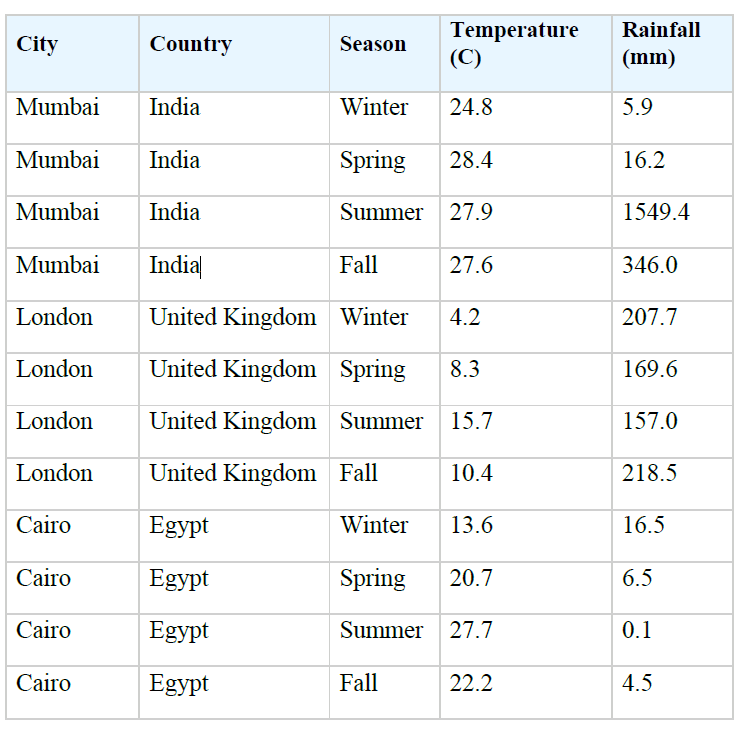

## Code Solution for Question 8 

### Creating the given table as database and initializing connection

In [21]:
import sqlite3

data = [
    ["Mumbai","India","Winter",24.8,5.9],
    ["Mumbai","India","Spring",28.4,16.2],
    ["Mumbai","India","Summer",27.9,1549.4],
    ["Mumbai","India","Fall",27.6,346.0],
    ["London","United Kingdom","Winter",4.2,207.7],
    ["London","United Kingdom","Spring",8.3,169.6],
    ["London","United Kingdom","Summer",15.7,157.0], 
    ["London","United Kingdom","Fall",10.4,218.5],
    ["Cairo","Egypt","Winter",13.6,16.5],
    ["Cairo","Egypt","Spring",20.7,6.5],
    ["Cairo","Egypt","Summer",27.7,0.1],
    ["Cairo","Egypt","Fall",22.2,4.5]
]

conn = sqlite3.connect('weather1.db')

c = conn.cursor()

c.execute('''
          CREATE TABLE weather 
          (city TEXT, country TEXT, season TEXT, 
           temperature REAL, rainfall REAL) 
          ''')

c.executemany('INSERT INTO weather VALUES (?,?,?,?,?)', data)

conn.commit() 
conn.close()

### A) All the temperature data.

In [29]:
conn = sqlite3.connect('weather1.db')
c = conn.cursor()
c.execute('SELECT temperature FROM weather')
temperatures = c.fetchall()
print("All Temperature Data:")
for temp in temperatures:
    print(temp[0])

All Temperature Data:
24.8
28.4
27.9
27.6
4.2
8.3
15.7
10.4
13.6
20.7
27.7
22.2


### B) All the cities, but without repetition.

In [30]:
c.execute('SELECT city FROM weather GROUP BY city ORDER BY city desc')
cities = c.fetchall()
print("Unique Cities (All the cities, but without repetition)")
for city in cities:
    print(city[0])


Unique Cities (All the cities, but without repetition)
Mumbai
London
Cairo


### C) All the records for India.

In [31]:
c.execute("SELECT * FROM weather WHERE country='India'")
rows = c.fetchall()
print("All the Records for India:")
for row in rows:
    print(row)

All the Records for India:
('Mumbai', 'India', 'Winter', 24.8, 5.9)
('Mumbai', 'India', 'Spring', 28.4, 16.2)
('Mumbai', 'India', 'Summer', 27.9, 1549.4)
('Mumbai', 'India', 'Fall', 27.6, 346.0)


### D) All the Fall records.

In [33]:
c.execute("SELECT * FROM weather WHERE season='Fall'")
rows = c.fetchall()
print("All the Fall Records:")
for row in rows:
  print(row)

All the Fall Records:
('Mumbai', 'India', 'Fall', 27.6, 346.0)
('London', 'United Kingdom', 'Fall', 10.4, 218.5)
('Cairo', 'Egypt', 'Fall', 22.2, 4.5)


### E) The city, country, and season for which the average rainfall is between 200 and 400 millimeters. 

In [41]:
c.execute("""
          SELECT city, country, season
          FROM weather 
          GROUP BY city, country, season
          HAVING AVG(rainfall) BETWEEN 200 AND 400 ORDER BY city desc, season desc
          """)
print("The city, country, and season for which the average rainfall is between 200 and 400 millimeters.")
rows = c.fetchall()
for row in rows:
    print(row)

The city, country, and season for which the average rainfall is between 200 and 400 millimeters.
('Mumbai', 'India', 'Fall')
('London', 'United Kingdom', 'Winter')
('London', 'United Kingdom', 'Fall')


### F) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order. 

In [42]:
c.execute("""
         SELECT city, country
         FROM weather 
         WHERE season = 'Fall' 
         GROUP BY city, country
         HAVING AVG(temperature) > 20
         ORDER BY AVG(temperature)
         """)
print("The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.")
rows = c.fetchall()
for row in rows:
    print(row)

The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.
('Cairo', 'Egypt')
('Mumbai', 'India')


### G) The total annual rainfall for Cairo.

In [43]:
c.execute("""
         SELECT SUM(rainfall) 
         FROM weather 
         WHERE city='Cairo'
         """)
print("The total annual rainfall for Cairo.")
result = c.fetchone()
print(result[0])

The total annual rainfall for Cairo.
27.6


### H) The total rainfall for each season.

In [49]:
c.execute("""
         SELECT season, SUM(rainfall) 
         FROM weather  
         GROUP BY season
         """)
rows = c.fetchall()
print("The total rainfall for each season:")
for row in rows:
    print(str(row[1]) + ", " + "'" + row[0] + "'")

The total rainfall for each season:
569.0, 'Fall'
192.29999999999998, 'Spring'
1706.5, 'Summer'
230.1, 'Winter'


## Question 9 

## Code Solution for Question 9

In [50]:
words = ['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

def get_uppercased_words(words):
  #Returns a new list with all words uppercased
  
  uppercased_words = []

  for word in words:
    uppercased_words.append(word.upper())

  return uppercased_words 

def get_lowercased_words(words):
  #Returns a new list with all words lowercased

  lowercased_words = []

  for word in words:
    lowercased_words.append(word.lower())

  return lowercased_words

def get_word_lengths(words):
  #Returns a new list with length of each word

  word_lengths = []

  for word in words:
    word_lengths.append(len(word))
  
  return word_lengths

def get_upper_lower_len_lists(words):
  #Returns a new nested list containing [uppercase, lowercase, length] for each word
  
  upper_lower_len_lists = []

  for word in words:
    list_for_word = []
    list_for_word.append(word.upper())
    list_for_word.append(word.lower()) 
    list_for_word.append(len(word))

    upper_lower_len_lists.append(list_for_word)

  return upper_lower_len_lists

def get_long_words(words):
  #Returns words from list containing 4 or more characters

  long_words = []

  for word in words:
    if len(word) >= 4:
      long_words.append(word)

  return long_words

print("a)", get_uppercased_words(words))
print("b)", get_lowercased_words(words))  
print("c)", get_word_lengths(words))
print("d)", get_upper_lower_len_lists(words)) 
print("e)", get_long_words(words))

a) ['THE', 'QUICK', 'BROWN', 'FOX', 'JUMPS', 'OVER', 'THE', 'LAZY', 'DOG']
b) ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
c) [3, 5, 5, 3, 5, 4, 3, 4, 3]
d) [['THE', 'the', 3], ['QUICK', 'quick', 5], ['BROWN', 'brown', 5], ['FOX', 'fox', 3], ['JUMPS', 'jumps', 5], ['OVER', 'over', 4], ['THE', 'the', 3], ['LAZY', 'lazy', 4], ['DOG', 'dog', 3]]
e) ['quick', 'brown', 'jumps', 'over', 'lazy']
